In [34]:
# https://www.youtube.com/watch?v=nNkKTJTu-mU&t=2201s

In [35]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

## Function that Saves Stock Data to CSV

In [36]:
# Function that gets a dataframe by providing a ticker and starting date
def save_to_csv_from_stooq(ticker, syear, smonth, sday, eyear, emonth, eday):
    
    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    # Reads data into a dataframe
    df = web.DataReader(ticker, 'stooq', start, end).sort_index()
    
    # Save data to a CSV file
    df.to_csv("C:/Users/gerha/Github/Python4Finance/Python4Finance" + ticker + '.csv')
    return df

In [37]:
save_to_csv_from_stooq('amzn', 2020, 1, 1, 2021, 1, 1)

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,93.750,94.9005,93.2075,94.9005,80718200
2020-01-03,93.225,94.3100,93.2250,93.7485,75332080
2020-01-06,93.000,95.1845,93.0000,95.1440,81313960
2020-01-07,95.225,95.6945,94.6020,95.3430,82680200
2020-01-08,94.902,95.5500,94.3220,94.5985,70239320
...,...,...,...,...,...
2020-12-24,159.695,160.1000,158.4500,158.6340,29038340
2020-12-28,159.700,165.2000,158.6340,164.1980,113735740
2020-12-29,165.497,167.5320,164.0610,166.1000,97458660


## Function that Returns a Dataframe from a CSV

In [38]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv("C:/Users/gerha/Github/Python4Finance/Python4Finance" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [39]:
AMZN = get_df_from_csv('AMZN')
AMZN

,Date,Open,High,Low,Close,Volume
0,2020-01-02,93.750,94.9005,93.2075,94.9005,80718200
1,2020-01-03,93.225,94.3100,93.2250,93.7485,75332080
2,2020-01-06,93.000,95.1845,93.0000,95.1440,81313960
3,2020-01-07,95.225,95.6945,94.6020,95.3430,82680200
4,2020-01-08,94.902,95.5500,94.3220,94.5985,70239320
...,...,...,...,...,...,...
248,2020-12-24,159.695,160.1000,158.4500,158.6340,29038340
249,2020-12-28,159.700,165.2000,158.6340,164.1980,113735740
250,2020-12-29,165.497,167.5320,164.0610,166.1000,97458660
251,2020-12-30,167.050,167.1050,164.1230,164.2920,64186200


## Add Daily Return to Dataframe

In [40]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Close'] / df['Close'].shift(1)) - 1
    # Save data to a CSV file
    df.to_csv("C:/Users/gerha/Github/Python4Finance/Python4Finance" + ticker + '.csv')
    return df  

In [41]:
add_daily_return_to_df(AMZN, 'AMZN')
AMZN

,Date,Open,High,Low,Close,Volume,daily_return
0,2020-01-02,93.750,94.9005,93.2075,94.9005,80718200,NaN
1,2020-01-03,93.225,94.3100,93.2250,93.7485,75332080,-0.012139
2,2020-01-06,93.000,95.1845,93.0000,95.1440,81313960,0.014886
3,2020-01-07,95.225,95.6945,94.6020,95.3430,82680200,0.002092
4,2020-01-08,94.902,95.5500,94.3220,94.5985,70239320,-0.007809
...,...,...,...,...,...,...,...
248,2020-12-24,159.695,160.1000,158.4500,158.6340,29038340,-0.003956
249,2020-12-28,159.700,165.2000,158.6340,164.1980,113735740,0.035074
250,2020-12-29,165.497,167.5320,164.0610,166.1000,97458660,0.011584
251,2020-12-30,167.050,167.1050,164.1230,164.2920,64186200,-0.010885


## Returns Total Return over Time

In [42]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['daily_return'].mean()
    
    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)
  

In [43]:
tot_ret = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total Return :", tot_ret)

Total Return : 0.6166367042719095


## Matplotlib Finance

In [44]:
# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:

        df = pd.read_csv("C:/Users/gerha/Github/Python4Finance/Python4Finance" + ticker + '.csv',index_col=0,parse_dates=True)
        
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

C:\Users\gerha\AppData\Local\Temp\ipykernel_35848\3405990969.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("C:/Users/gerha/Github/Python4Finance/Python4Finance" + ticker + '.csv',index_col=0,parse_dates=True)


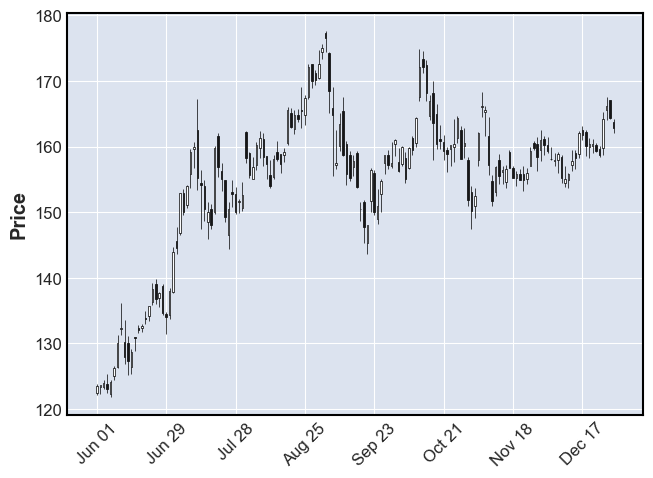

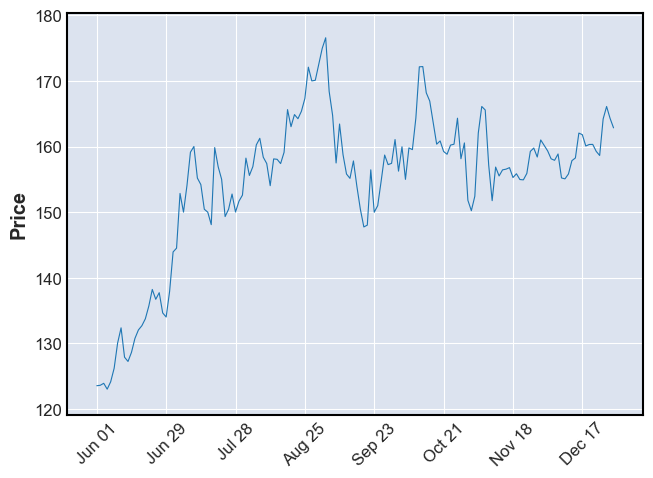

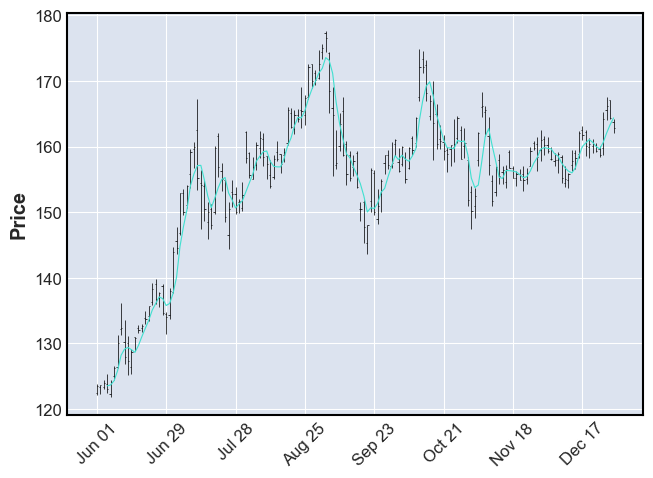

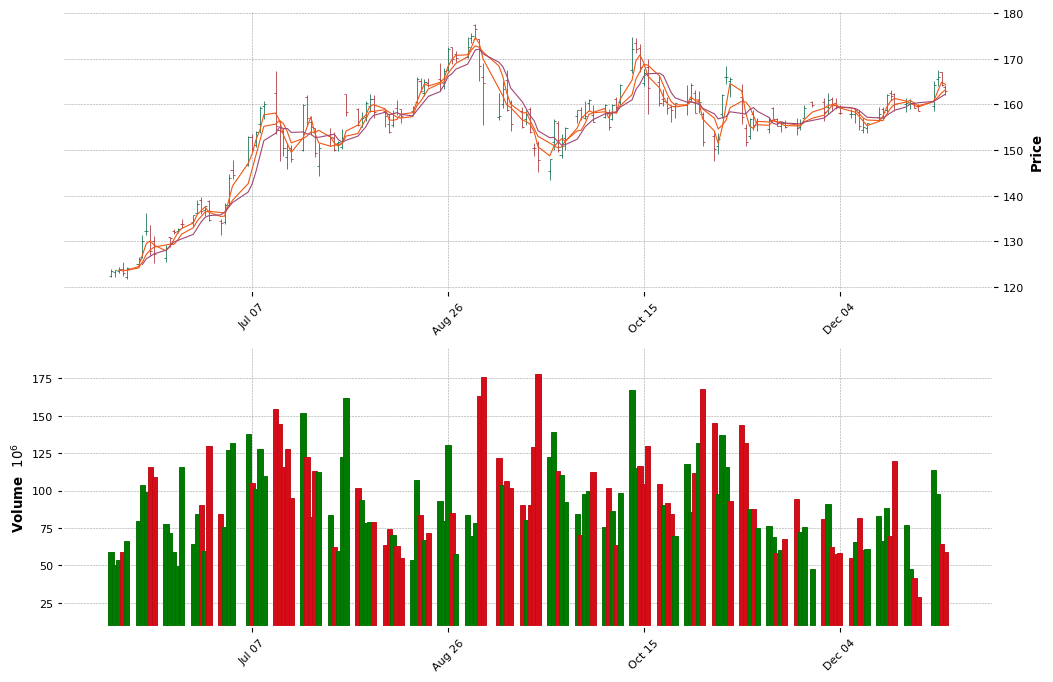

In [45]:
mplfinance_plot('AMZN', 'ohlc', 2020, 6, 1, 2021, 1, 1)

## Simple Price Plot

In [46]:
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:

        df = pd.read_csv("C:/Users/gerha/Github/Python4Finance/Python4Finance" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')

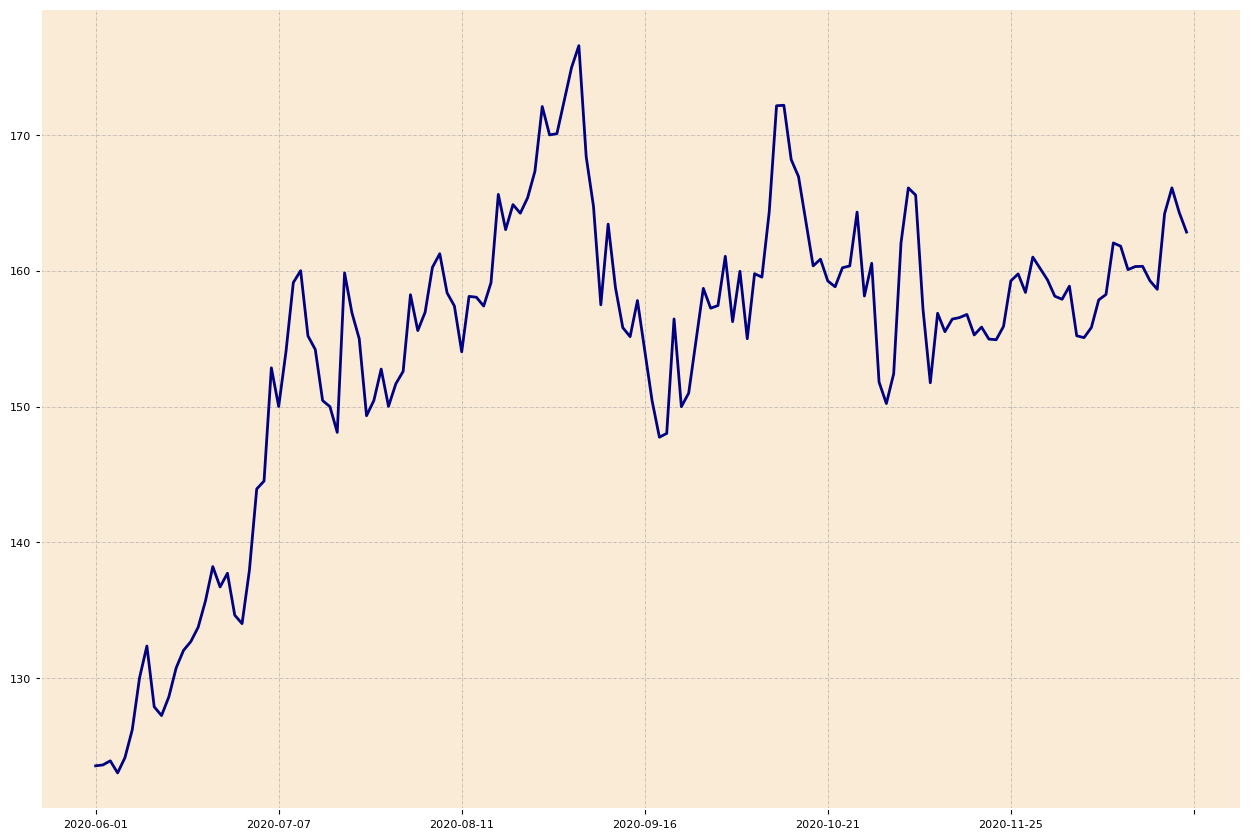

In [47]:
price_plot('AMZN', 2020, 6, 1, 2021, 1, 1)

## Download Multiple Stocks

In [48]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_stooq(x, syear, smonth, sday, eyear, emonth, eday)

In [49]:
tickers = ["AAPL", "NFLX", "GOOG"]
download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

## Merge Multiple Stocks in One Dataframe by Column Name

In [50]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'stooq', start, end)[col_name].sort_index()
        
    return mult_df

In [51]:
tickers = [ "AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('Close',  2020, 1, 1, 2021, 1, 1, *tickers)
mult_df.tail()

,AMZN,AAPL,NFLX,GOOG
Date,,,,
2020-12-24,158.634,128.904,51.397,86.9425
2020-12-28,164.198,133.525,51.912,88.8045
2020-12-29,166.100,131.732,53.087,87.9360
2020-12-30,164.292,130.618,52.459,86.9760
2020-12-31,162.846,129.613,54.073,87.5940


## Get Changing Value of Investment using Multiple Stocks

In [52]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

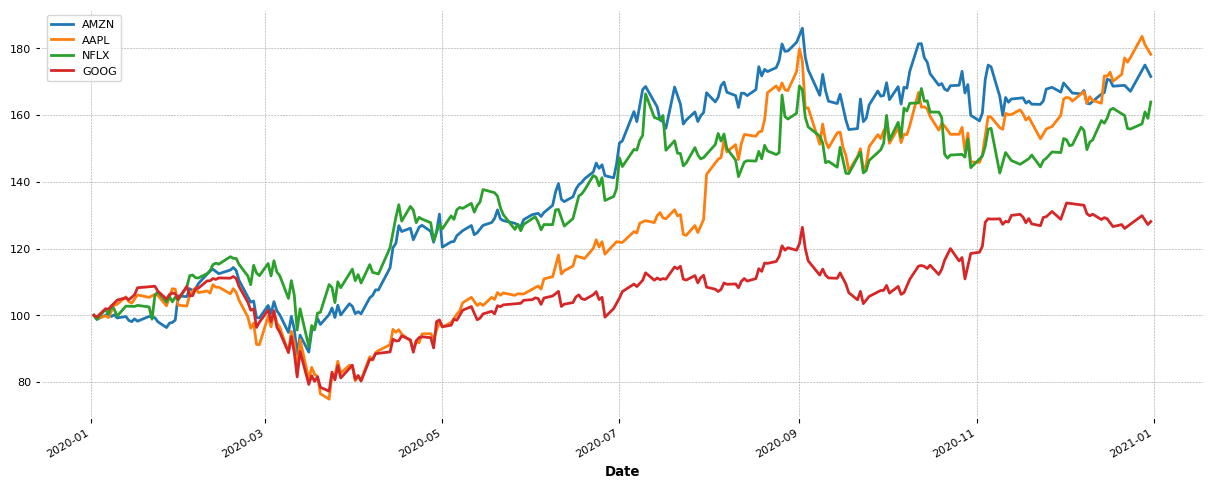

In [53]:
plot_return_mult_stocks(100, mult_df)

## Get Standard Deviation for Multiple Stocks

Risk is a measure of the variability of return. Variance and Standard Deviation allow us to quantify risk.


Variance is a measure of how spread out a data set is. It is calculated as the average squared deviation of each number from the mean of a data set.n It equals the sum of the squares of the difference between each data point and the mean divided by the number of data points minus 1.

$s^2$ = $\frac{\sum (x - \hat{x})^2}{N - 1}$

Example : If we have 3 annual returns of 23%, -8% and 15%. The mean return is 10%.

* $(23 - 10)^2$ = 169
* $(-8 - 10)^2$ = 324
* $(15 - 10)^2$ = 25
* = 169 + 324 + 25 = 518 / (3-1) = 259 = 2.59

---

Standard deviation is a measure of the amount of variation within a set of values. A low standard deviation indicates that the values tend to be close to the mean. A high standard deviation means values are more spread out. To get the Standard Deviation find the square root of the variance.

$\sqrt{s^2}$ = $\sqrt{2.59}$ = 1.609

In [54]:
# Receives the dataframe with the Adj Close data along with the stock ticker
# Returns the mean and standard deviation associated with the ticker
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [55]:
# Receives the dataframe with the stock ticker as the column name and
# the Adj Close values as the column data and returns the mean and 
# standard deviation
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

In [56]:
get_mult_stock_mean_sd(mult_df)
mult_df

Stock: AMZN Mean:  134.04 Standard deviation: 27.29
Coefficient of Variation: 0.20357689911211427

Stock: AAPL Mean:   92.84 Standard deviation: 21.44
Coefficient of Variation: 0.23098490023899515

Stock: NFLX Mean:   44.68 Standard deviation: 6.56
Coefficient of Variation: 0.14684124511433316

Stock: GOOG Mean:   74.07 Standard deviation: 8.80
Coefficient of Variation: 0.11878453130587559



,AMZN,AAPL,NFLX,GOOG
Date,,,,
2020-01-02,94.9005,72.7161,32.981,68.3685
2020-01-03,93.7485,72.0115,32.590,68.0330
2020-01-06,95.1440,72.5811,33.583,69.7105
2020-01-07,95.3430,72.2432,33.075,69.6670
2020-01-08,94.5985,73.4042,33.926,70.2160
...,...,...,...,...
2020-12-24,158.6340,128.9040,51.397,86.9425
2020-12-28,164.1980,133.5250,51.912,88.8045
2020-12-29,166.1000,131.7320,53.087,87.9360


## Test Functions

Total Return : 0.6166367042719095
Stock: AMZN Mean:  134.04 Standard deviation: 27.29
Coefficient of Variation: 0.20357689911211427

Stock: AAPL Mean:   92.84 Standard deviation: 21.44
Coefficient of Variation: 0.23098490023899515

Stock: NFLX Mean:   44.68 Standard deviation: 6.56
Coefficient of Variation: 0.14684124511433316

Stock: GOOG Mean:   74.07 Standard deviation: 8.80
Coefficient of Variation: 0.11878453130587559



,AMZN,AAPL,NFLX,GOOG
Date,,,,
2020-01-02,94.9005,72.7161,32.981,68.3685
2020-01-03,93.7485,72.0115,32.590,68.0330
2020-01-06,95.1440,72.5811,33.583,69.7105
2020-01-07,95.3430,72.2432,33.075,69.6670
2020-01-08,94.5985,73.4042,33.926,70.2160
...,...,...,...,...
2020-12-24,158.6340,128.9040,51.397,86.9425
2020-12-28,164.1980,133.5250,51.912,88.8045
2020-12-29,166.1000,131.7320,53.087,87.9360


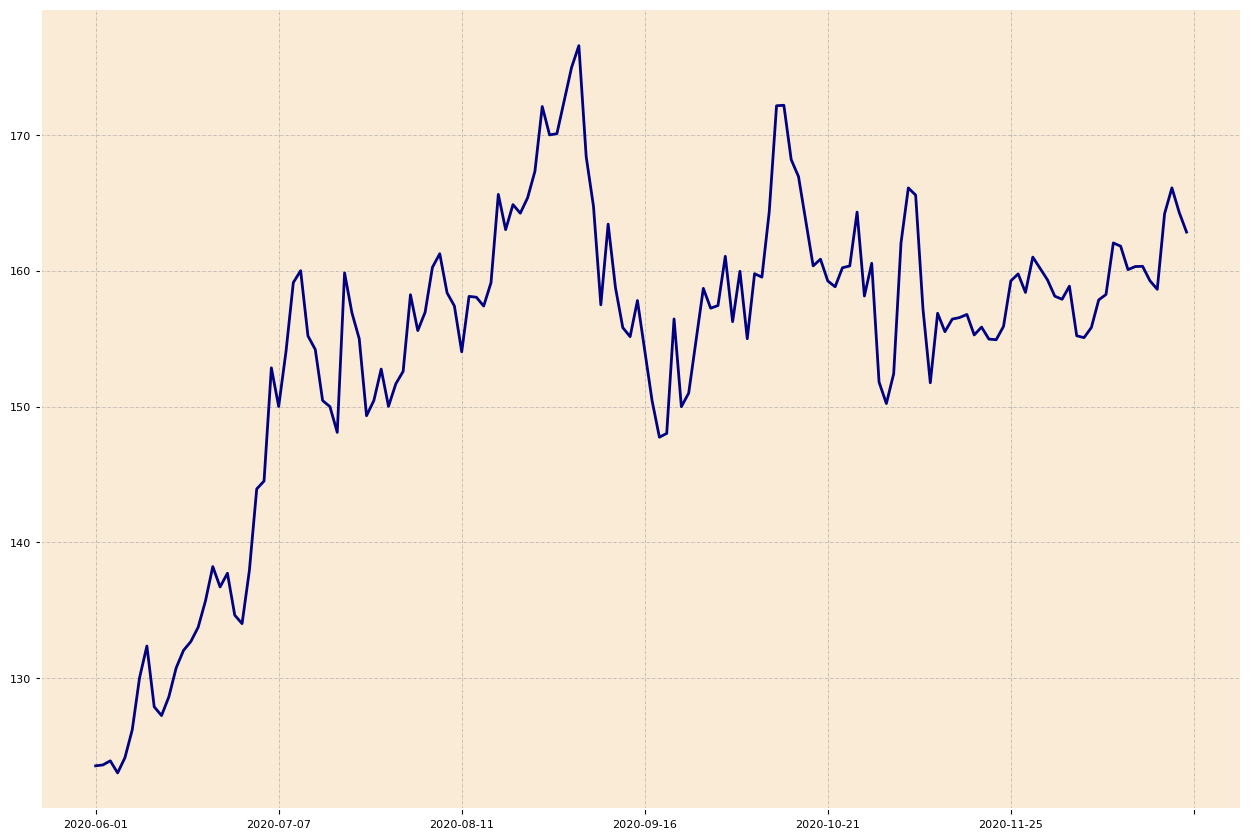

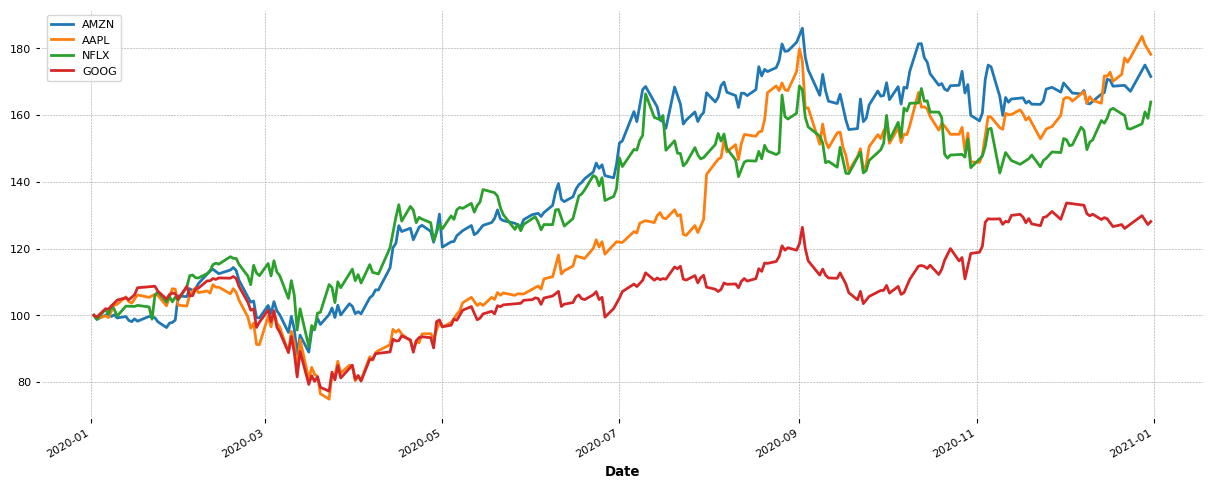

In [59]:
# Call to read the data from Yahoo into a CSV and then retrieve a Dataframe
AMZN = save_to_csv_from_stooq('AMZN', 2020, 1, 1, 2021, 1, 1)

# Retrieve data from the CSV file
AMZN = get_df_from_csv('AMZN')

# Add daily return to function
add_daily_return_to_df(AMZN, 'AMZN')

# Get total return between dates
tot_ret = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total Return :", tot_ret)

# Use Matplotlib finance to print multiple charts
# mplfinance_plot('AMZN', 'ohlc', 2020, 6, 1, 2021, 1, 1)

price_plot('AMZN', 2020, 6, 1, 2021, 1, 1)

# Download multiple stocks
tickers = ["AAPL", "NFLX", "GOOG"]
# download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

# Merge dataframes from multiple stocks using the same column name
tickers = ["AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('Close',  2020, 1, 1, 2021, 1, 1, *tickers)
mult_df.tail()

# Pass Investment Amount and Plot Returns using Multiple Stocks
plot_return_mult_stocks(100, mult_df)

# Pass multiple stocks with their adjusted close values to receive their
# different means and standard deviations
get_mult_stock_mean_sd(mult_df)
mult_df

# It is hard to compare stocks by standard deviation when their stock prices
# are so different. The coefficient of variation is the ratio between the 
# standard deviation and the mean and it provides a comparable standard deviation
# We get it by dividing the standard deviation by the mean cov = std / mean
# We see here that GOOG has the least amount of variability